In [1]:
import pandas as pd
import preprocessing as pp
import utils as utils
import numpy as np
from xgboost.sklearn import XGBClassifier
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = utils.importar_datos()

### Métricas finales

In [4]:
pipeline = Pipeline([
    ("preprocessor", pp.PreprocessingOHE()),
    ("model", XGBClassifier(use_label_encoder=False, scale_pos_weight=1, subsample=0.8, colsample_bytree=0.8,
                            objective="binary:logistic", n_estimators=1000, learning_rate=0.01, n_jobs=-1,
                            eval_metric="logloss", min_child_weight=6, max_depth=6, reg_alpha=0.05))
])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.892174,0.842975,0.885714,0.673913,0.765432


Matriz de confusión:


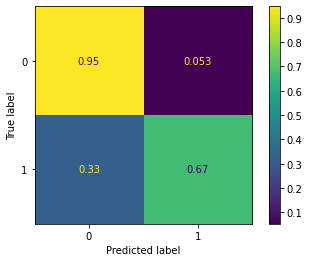

In [5]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

La métrica objetivo AUC-ROC tiene un resultado similar al obtenido al utilizar LE. Sin embargo, se observa que aumento la tasa de Falsos Negativos con respecto al otro modelo, por lo que su Recall (y por ende su F1 Score) disminuyó (en 0.09). A su vez, mejoró levemente la tasa de Verdaderos Negativos. 

### Predicción HoldOut

In [6]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/4-XGBoost-OHE.csv')